# DATA PREPROCESS
A notebook to preprocess the crawled data.

# 1. Setup

In [75]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# Data preprocessing

In [76]:
from google.colab import drive

drive.mount('/content/gdrive')

In [77]:
dff = pd.read_csv('/content/gdrive/MyDrive/DS/zillow_cleaned.csv')

##3.1 Mispell word handling

First let's list all the object-type feature

In [79]:
object_col = ['status', 'type', 'broker_name', 'has_add_attributions',
       'city', 'state', 'num_fireplaces', 'parking','lot_features',
       'subtype', 'architectural_style', 'sewer_info',
       'water_info', 'appliances', 'heating', 'cooling', 'stories',
       'materials', 'roof', 'foundation', 'interior_features', 'compensation']



Since these object-type features appeared due to the 'flatten()' function in the previous data cleaning process, so the 'NaN' values appearing in these features mean that 'doesn't exist', not missing value, so that we're gonna replace them by 'none'

We're gonna check the object-type features in our data to see if they have any mispell-words

In [80]:
for i in object_col:
  print(i, ": ",dff[i].nunique())

status :  9
type :  1
broker_name :  3264
has_add_attributions :  2
city :  177
state :  14
num_fireplaces :  92
parking :  280
lot_features :  361
subtype :  26
architectural_style :  394
sewer_info :  101
water_info :  73
appliances :  194
heating :  128
cooling :  116
stories :  31
materials :  181
roof :  288
foundation :  62
interior_features :  448
compensation :  369


Seems like some features have a lot of unique values (architecture style, interior_features,...), so they are prone to have many values that mispelled.
Let's see those values, start with feature 'num_fireplaces' 

In [81]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


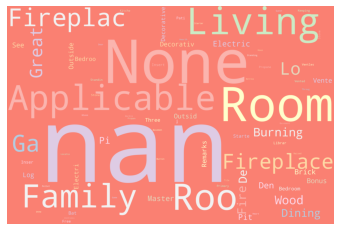

In [82]:
from wordcloud import WordCloud, STOPWORDS
text=''
for i in range(dff.shape[0]):
    text+=str(dff['num_fireplaces'][i])+' '
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [83]:
for i in object_col:
  dff[i]=dff[i].fillna(value = 'none')

As you can see, there are quiet a lot mispelled values. For example, 'Fireplac' and 'Fireplace', Roo' and 'Room',... They are pointing at the same object but the mispelling is making them become different, and this will affect negatively to our prediction model.
After checking other features, we have collect many other mispell words too, and the most convenient way to fix them is to correct them directly.
We gather all mispell words and their correction in a dictionary and we will use that too fix all features in our data  

In [84]:
dict = {
'de':'den',
'vente':'vented',
'wate': 'water',
'microwav':'microwave',
'washe': 'washer',
'drye': 'dryer',
'refrigerato': 'refrigerator',
'ove':'oven',
 'gril':'grill', 
 'compacto':'compactor',
 'cookto':'cooktop',
  'stov':'stove',
  'barbequ':'barbeque',
 'barbecu': 'barbeque',
  'rang': 'range',
  'ga':'gas',
  'disposa':'disposal',
  'heate':'heater',
  'ele':'electric',
  'elec':'electric',
  'kitche': 'kitchen',
  'othe':'other',
  'electri': 'electric',
  'fridg':'fridge',
  'uni':'unit',
  'vacuu':'vacuum',
  'non': 'none',
  'basemen':'basement',

  'propan': 'propane',
  'oi':'oil',
  'pum': 'pump',
  'ai': 'air',
  'stea': 'steam',
  'centra':'central',
  'furnac' : 'furnace',
  'equipmen': 'equipment',
  'combinatio': 'combination',
  'uni' : 'unit',
  'ceilin': 'ceiling',
  'radiato' : 'radiator',
  'backu': 'backup',
  'gravit': 'gravity',
  'plac':'place',
  'heatin': 'heating',
  'floo': 'floor',
  'inser': 'insert',
  'boile': 'boiled',
   'a/': 'a/c',
   'geotherma': 'geothermal',
   'dua': 'dual',
   'efficienc': 'efficiency',

   'sidin': 'siding',
   'lo': 'log',
   'partia': 'partial',
   'shak':'shake',
   'bric': 'brick',
   'planke': 'planked',
   'fram':'frame',
   'syste': 'system',

   'combinatio': 'combination',
   'sla': 'slab',
   'perimete':'perimeter',
   'bloc': 'block',
   'bea': 'beam',
   'ston': 'stone',
   'permanen':'permanent',
   'spac': 'space',
   'concret':'concrete',
   'gri':'grid',
   'ful':'full',
   'ribbo':'ribbon',
   'roo': 'room',
   'sid':'side',
   'gasrag':'garage',
    'gasrage':'garage',
    'fire pi': 'fire pit',
    'free standin':'free standing',
    'throug': 'through',
    'connecte':'connected'
}

We define a function to replace the mispell word with its correct word

In [85]:
def is_mispell(word):
  mispell, correct ="",""
  for i in dict.keys():
    if dict[i] not in word and i in word:
      mispell = i
      correct = dict[i]
  return mispell,correct
mispell, correct = is_mispell('garage')
print(correct)

gas


In [86]:
type(dff['foundation'][34])

str

In [87]:
mispell_col = ['foundation','num_fireplaces','appliances','heating','materials','parking','sewer_info'] #columns contain mispell categorical values
for i in range(dff.shape[0]):
  for col in mispell_col:
      dff[col][i] = str(dff[col][i]).lower()
      mispell, correct = is_mispell(dff[col][i])
      if mispell != "":
        dff[col][i] = dff[col][i].replace(mispell,correct)

In [88]:
dff['num_fireplaces'].unique()

array(['none', 'pellet stoven', '1.0', 'wood burning stoven', '2.0',
       '3.0', '6.0', 'family room', 'living room', 'dencorative',
       'dining room', 'other', 'den', 'great room', 'outside',
       'see remarks', '5.0', 'fire pit', 'master bedroom', 'gas', 'pati',
       'guest hous', 'electric', '8.0', '7.0', '4.0', 'dencorativ',
       'rairsed heart', 'bat', 'bonus room', 'librar', 'kitchen', '13.0',
       'master retrea', 'wood burning', 'outsiden', 'game room', '9.0',
       '10.0', 'other (see remarks)', 'free standing', 'see through',
       'marble', 'gas/propane', 'insert', 'brick', 'not applicable',
       'three', 'gas starte', 'other/remarks', 'gas starter',
       '1 fireplace', '2 or more fireplaces', 'brick fireplace',
       'family room/den/great room', '2 or more fireplace',
       'stone fireplace', 'family room/den/great roo', 'tile fireplace',
       'gas log', 'vented', 'ventles', 'primary bedroom', 'ventless',
       'keeping room', 'hearth room', 'wood b

## 3.2 Convert object features to number

While seeing values of feature 'stories', we have found this

In [89]:
dff['stories'].unique()

array(['none', '2.0', '3.0', '1.0', '5.0', 'Multi/Split', '4.0', 'Two',
       'Three Or More,Multi/Split', 'One', 'Three Or More', '6.0', '7.0',
       'Other/Remarks', 'One and One Half', 'Split Level',
       'Split Level,Tri-Level', 'Tri-Level', 'Single Story', '2 Story',
       '2 story + basement', 'Two Story/Basement', 'Three Story',
       'One Story Basement', 'Three Story/Basement', 'One Story/F.R.O.G.',
       'Two and a Half Story/Basement', 'One and a Half Story/Basement',
       'Three or More Stories,Three Or More', 'Three or More Stories',
       'Other', 'Bi-Level'], dtype=object)

We are given different kind of stories that a house can have, but each of these can be performed by a specific number, so that we can understand the size, the architecture of the house, so that we can obtain a better prediction system.
So let's convert these values into numbers.

In [90]:
import random 
story_dict = {
    'none': 0,
     'Multi/Split':3.0,
 'Two':2.0,
 'Three Or More,Multi/Split': 3.5,
 'One': 1.0,
 'Three Or More':3.5,
 'Other/Remarks': random.randint(1, 7),
 'One and One Half': 2.5,
 'Split Level': 3.0,
 'Split Level,Tri-Level':3.0,
 'Tri-Level':3.0,
 'Single Story':1.0,
 '2 Story':2.0,
 'Two Story/Basement':2.5,
 'Three Story':3.0,
 'One Story Basement':1.5,
 'Three Story/Basement':3.5,
 'One Story/F.R.O.G.':1.0,
 'Two and a Half Story/Basement':3.0,
 'One and a Half Story/Basement':2.0,
 'Three or More Stories,Three Or More':3.5,
 'Three or More Stories':3.5,
 'Other': random.randint(1, 7),
 'Bi-Level':2.0,
 '2 story + basement': 2.5
}

In [91]:
for i in range(dff.shape[0]):
    if dff['stories'][i] in story_dict.keys():
       dff['stories'][i] = story_dict[dff['stories'][i]]
    elif dff['stories'][i] =='none': 
       dff['stories'][i]=0.0
    else:
      dff['stories'][i]=float(dff['stories'][i])

In [92]:
stories_unique = list(dff['stories'].unique())
stories_unique

[0, 2.0, 3.0, 1.0, 5.0, 4.0, 3.5, 6.0, 7.0, 2.5, 1.5]

In [93]:
dff['stories'] = dff['stories'].astype('float64')

In [94]:
dff

,price,status,type,broker_name,has_add_attributions,city,state,latitude,longitude,bathrooms,...,water_info,appliances,heating,cooling,stories,materials,roof,foundation,interior_features,compensation
0,274000,House for sale,SINGLE_FAMILY,SOWAE CORP,True,South Ozone Park,NY,40.675730,-73.822350,1,...,none,none,none,none,0.0,none,none,none,none,none
1,270000,House for sale,SINGLE_FAMILY,SOWAE CORP,True,Jamaica,NY,40.670036,-73.780450,2,...,none,microwave,none,none,0.0,none,none,none,none,none
2,899000,House for sale,SINGLE_FAMILY,Comfort Homes Realty Group Inc,True,Staten Island,NY,40.524227,-74.215790,3,...,none,dishwasher,hot water,Units,2.0,none,none,none,none,none
3,1390000,House for sale,SINGLE_FAMILY,Winzone Realty Inc,True,Flushing,NY,40.721615,-73.820755,4,...,none,dryer,none,none,0.0,none,none,none,none,none
4,1390000,House for sale,SINGLE_FAMILY,Winzone Realty Inc,True,Flushing,NY,40.721615,-73.820755,4,...,Public,none,natural gas,Wall Unit(s),3.0,frame,none,none,Eat-in Kitche,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13696,1479000,House for sale,SINGLE_FAMILY,Compass,True,Nashville,TN,36.123120,-86.778210,5,...,Public,electric water heater,central,Central A/,3.0,other,none,brick/mortar,none,% Of Gross2.5
13697,575000,House for sale,SINGLE_FAMILY,"RE/MAX Gateway, LLC",True,Nashville,TN,36.204834,-86.738660,2,...,Public,dishwasher,forced air,Central A/,3.0,brick,none,slab,Kitchen - Gourme,% Of Gross3
13698,609000,House for sale,SINGLE_FAMILY,"Long & Foster Real Estate, Inc.",True,Nashville,TN,36.196106,-86.735115,3,...,Public,gas water heater,hot water,Ductless/Mini-Spli,3.0,brick,none,brick/mortar,Ceiling Fan(s),% Of Gross2.5
13699,460000,Coming soon,SINGLE_FAMILY,Northrop Realty,True,Nashville,TN,36.026558,-86.717710,2,...,Public,built-in microwave,forced air,Central A/,3.0,combination,Unknown,other,Ceiling Fan(s,% Of Gross2.5


## 3.3 Unify the area units

While crawling the data, we found that the features 'living area' and 'lot area' are written in two different units: sqrft and acre. So we're gonna convert all of them into sqrft.

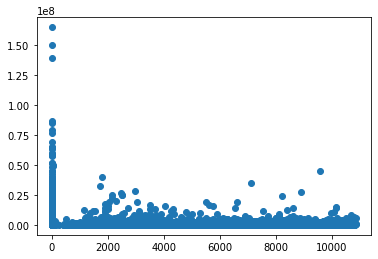

In [95]:
plt.scatter(dff['lot_area'],dff['price'])
plt.show()

In [96]:
for i in range(dff.shape[0]):
  if dff['lot_area'][i]<3:
    dff['lot_area'][i]=dff['lot_area'][i]*43560

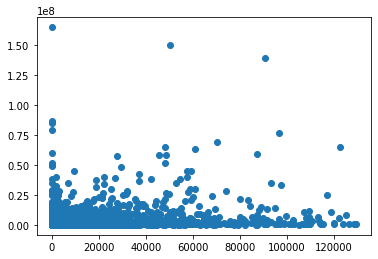

In [97]:
plt.scatter(dff['lot_area'],dff['price'])
plt.show()

## 3.4 Filling missing values

Let's see which features have missing values that need to be handled

,Total,Percent
garage_spaces,4925,35.946281
covered_spaces,4717,34.428144
total_spaces,3496,25.516386
full_bathrooms,891,6.503175
year_built,144,1.051018


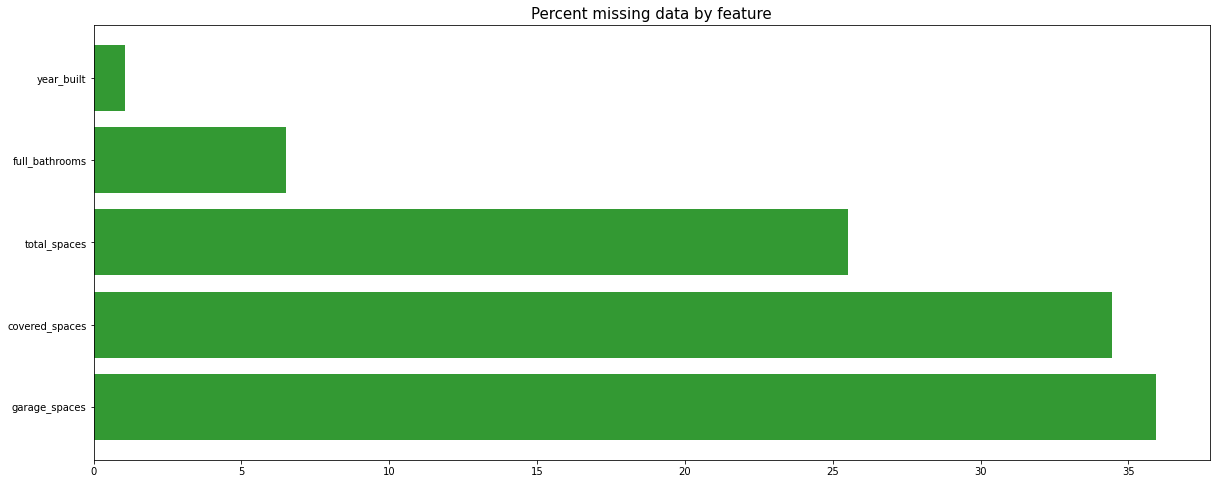

In [98]:

def missingData(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    md = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    md = md[md["Percent"] > 0]
    plt.figure(figsize = (20, 8))
    plt.barh(md.index, md["Percent"],color="g",alpha=0.8)
    plt.title('Percent missing data by feature', fontsize=15)
    return md
missingData(dff)

Since 'year_built' and 'full_bathrooms' have low percentage of missing value (<10%), so we just fill them with their mean value

In [99]:
dff['year_built'].fillna(value=dff['year_built'].mean(), inplace=True)
dff['full_bathrooms'].fillna(value=dff['full_bathrooms'].mean(), inplace=True)

But with other float-type features, since they have high percentage of missing values (>25%), so for the best promising prediction, we're gonna use KNN to impute the missing value

In [100]:
#fill missing value in float-type columns using KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=100, weights="uniform")
dff[['covered_spaces','garage_spaces','total_spaces']]= imputer.fit_transform(dff[['covered_spaces','garage_spaces','total_spaces']])
dff = dff.astype({'year_built':'int16', 'full_bathrooms':'int','covered_spaces':'int','garage_spaces':'int','total_spaces':'int'})



While looking at the data, we also found that 'living area', 'lot area','bathrooms' and 'bedrooms' cannot take 0 as their values, so we consider it as missing value. 

Text(0.5, 1.0, 'Percent missing data by feature')

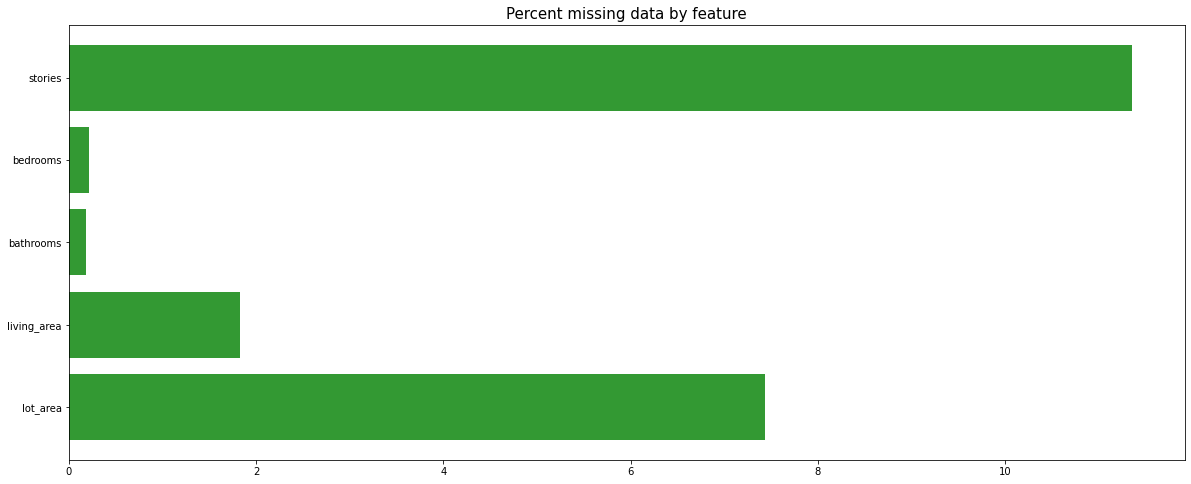

In [101]:
#list of columns that contain 0 as missing values
col_contains_0=['lot_area', 'living_area','bathrooms','bedrooms','stories']
lists = []
for i in col_contains_0:
  lists.append([i,dff[dff[i]==0][i].count()/dff.shape[0]*100])
new_df = pd.DataFrame(lists, columns = ['Feature','Percentage of null'])
new_df
plt.figure(figsize = (20, 8))
plt.barh(new_df['Feature'], new_df["Percentage of null"],color="g",alpha=0.8)
plt.title('Percent missing data by feature', fontsize=15)

Since the number of 0s in the feature is not significant (< or around 10%) so we can just fill them with their mean value

In [102]:
#fill them with means
for i in range(dff.shape[0]):
  for col in col_contains_0[:-1]:
    if dff[col][i]==0:
      dff[col][i]=dff[col].mean()
dff=dff.astype({'bathrooms':'int','bedrooms':'int'})

In [103]:
for i in range(dff.shape[0]):
    if dff['stories'][i]==0:
        dff['stories'][i]=round(dff['stories'].mean()/0.5)/2
dff=dff.astype({'stories':'float'})

In [104]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13701 entries, 0 to 13700
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 13701 non-null  int64  
 1   status                13701 non-null  object 
 2   type                  13701 non-null  object 
 3   broker_name           13701 non-null  object 
 4   has_add_attributions  13701 non-null  bool   
 5   city                  13701 non-null  object 
 6   state                 13701 non-null  object 
 7   latitude              13701 non-null  float64
 8   longitude             13701 non-null  float64
 9   bathrooms             13701 non-null  int64  
 10  bedrooms              13701 non-null  int64  
 11  living_area           13701 non-null  int64  
 12  lot_area              13701 non-null  float64
 13  tax_assessed_value    13701 non-null  int64  
 14  full_bathrooms        13701 non-null  int64  
 15  num_fireplaces     

##3.5 Remove duplicate records (with same longitude and latitude)

In [105]:
def del_dup(df):
    l = list(df.loc[:, ["latitude", "longitude"]].duplicated())
    store = []
    for index in range(len(l)):
        if l[index] == True:
            store.append(index)
    return df.drop(store)

In [106]:
dff = del_dup(dff)

## 3.6 Prepare data for next step

In [107]:
useless_cols = ['type', 'broker_name','full_bathrooms', 'lot_features',"architectural_style", "compensation", "tax_assessed_value"]

In [108]:
dff.drop(useless_cols, axis =1, inplace=True)

In [109]:
dff.rename(columns={
        'has_add_attributions': 'add_attr', 
        "latitude": "lat",
        "longitude": "long",
        "bathrooms": "bath", 
        "bedrooms": "bed",
        "living_area": "living",
        "lot_area": "lot_a",
        "num_fireplaces": "fireplace",
        "covered_spaces": "covered",
        "garage_spaces": "garage",
        "year_built": "year",
        "appliances": "app",
        'water_info': 'water',
        'sewer_info': 'sewer',
        "interior_features": "interior"},
    inplace=True)

In [110]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13510 entries, 0 to 13700
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         13510 non-null  int64  
 1   status        13510 non-null  object 
 2   add_attr      13510 non-null  bool   
 3   city          13510 non-null  object 
 4   state         13510 non-null  object 
 5   lat           13510 non-null  float64
 6   long          13510 non-null  float64
 7   bath          13510 non-null  int64  
 8   bed           13510 non-null  int64  
 9   living        13510 non-null  int64  
 10  lot_a         13510 non-null  float64
 11  fireplace     13510 non-null  object 
 12  parking       13510 non-null  object 
 13  covered       13510 non-null  int64  
 14  garage        13510 non-null  int64  
 15  total_spaces  13510 non-null  int64  
 16  subtype       13510 non-null  object 
 17  year          13510 non-null  int16  
 18  sewer         13510 non-nu

In [ ]:
dff.to_csv("/content/gdrive/MyDrive/DS/zillow_preprocessed.csv", index=False)